# Install Require Modules

In [20]:
import tensorflow as tf
import os

In [24]:
import numpy as np
from matplotlib import pyplot as plt

# Load Data

In [21]:
data = tf.keras.utils.image_dataset_from_directory('Downloads/Cat&Dog')

Found 8005 files belonging to 2 classes.


In [22]:
data_iterator = data.as_numpy_iterator()

In [26]:
batch = data_iterator.next()

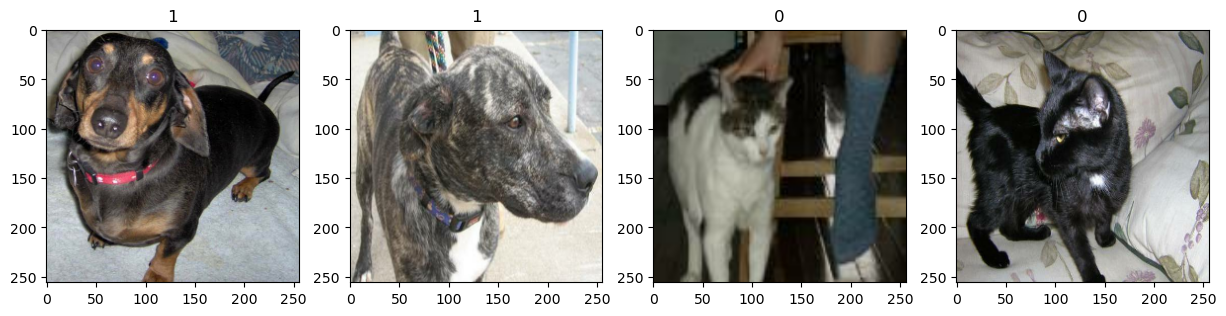

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(15,15))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [28]:
data = data.map(lambda x,y : (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.40477175, 0.6237439 , 0.81162906],
          [0.40477175, 0.6237439 , 0.8116718 ],
          [0.40568322, 0.6246553 , 0.81262594],
          ...,
          [0.65973496, 0.6440487 , 0.69895065],
          [0.654902  , 0.6392157 , 0.69411767],
          [0.654902  , 0.6392157 , 0.69411767]],
 
         [[0.16669066, 0.34326848, 0.63864124],
          [0.16929686, 0.34587467, 0.6415594 ],
          [0.17582463, 0.35240245, 0.6483992 ],
          ...,
          [0.6654795 , 0.6497932 , 0.70469517],
          [0.654902  , 0.6392157 , 0.69411767],
          [0.654902  , 0.6392157 , 0.69411767]],
 
         [[0.20380668, 0.34434742, 0.6572304 ],
          [0.20941329, 0.34995404, 0.662837  ],
          [0.21770833, 0.35824907, 0.671132  ],
          ...,
          [0.6664233 , 0.65073705, 0.705639  ],
          [0.654902  , 0.6392157 , 0.69411767],
          [0.654902  , 0.6392157 , 0.69411767]],
 
         ...,
 
         [[0.57262987, 0.49072883, 0.49972427],
          [0.58441

# Split Data For Training

In [29]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [30]:
print(f'training data size (no. of batches) : {train_size}')
print(f'validation data size (no. of batches): {val_size}')
print(f'testing data size (no. of batches): {test_size}')

training data size (no. of batches) : 175
validation data size (no. of batches): 50
testing data size (no. of batches): 25


In [31]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Making Deep Learning Model

In [32]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [54]:
cnn = Sequential()

In [55]:
cnn.add(Conv2D(32,(3,3),input_shape= (256,256,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(16,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(8,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [56]:
cnn.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [57]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     1,843,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,850,393 (7.06 MB)

 Trainable params: 1,850,393 (7.06 MB)

 Non-trainable params: 0 (0.00 B)

# Training Model

In [58]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [59]:
hist = cnn.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.4910 - loss: 0.7218 - val_accuracy: 0.5412 - val_loss: 0.6920
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 119s 678ms/step - accuracy: 0.5100 - loss: 0.6929 - val_accuracy: 0.5900 - val_loss: 0.6713
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 116s 662ms/step - accuracy: 0.5644 - loss: 0.6802 - val_accuracy: 0.5900 - val_loss: 0.6917
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 123s 703ms/step - accuracy: 0.6452 - loss: 0.6254 - val_accuracy: 0.6419 - val_loss: 0.6503
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 121s 690ms/step - accuracy: 0.7439 - loss: 0.5093 - val_accuracy: 0.6538 - val_loss: 0.6949
Epoch 6/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 118s 669ms/step - accuracy: 0.8765 - loss: 0.2818 - val_accuracy: 0.6687 - val_loss: 0.9511
Epoch 7/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 121s 688ms/step - accuracy: 0.9648 - loss: 0.1053 - val_accuracy: 0.6744 - val_loss: 1.4769
Epoch 8/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 121s 688ms/step - accuracy: 0.9872 - lo

In [60]:

hist.history

{'accuracy': [0.49392858147621155,
  0.5219643115997314,
  0.5808928608894348,
  0.6621428728103638,
  0.7685714364051819,
  0.8989285826683044,
  0.9689285755157471,
  0.987500011920929,
  0.9912499785423279,
  0.9933928847312927,
  0.9941071271896362,
  0.998035728931427,
  0.9982143044471741,
  0.9969642758369446,
  0.9987499713897705,
  0.9975000023841858,
  0.9973214268684387,
  0.9994642734527588,
  0.9992856979370117,
  0.9996428489685059],
 'loss': [0.7003605365753174,
  0.6910742521286011,
  0.6723772883415222,
  0.6127351522445679,
  0.47684958577156067,
  0.24066078662872314,
  0.09363346546888351,
  0.045592304319143295,
  0.03200816363096237,
  0.022273607552051544,
  0.019646791741251945,
  0.009875044226646423,
  0.00838969461619854,
  0.01257561519742012,
  0.005125053692609072,
  0.008494485169649124,
  0.00942294392734766,
  0.002262543886899948,
  0.0029178804252296686,
  0.0018371217884123325],
 'val_accuracy': [0.5412499904632568,
  0.5899999737739563,
  0.58999997

# Testing

In [63]:

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [65]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = cnn.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


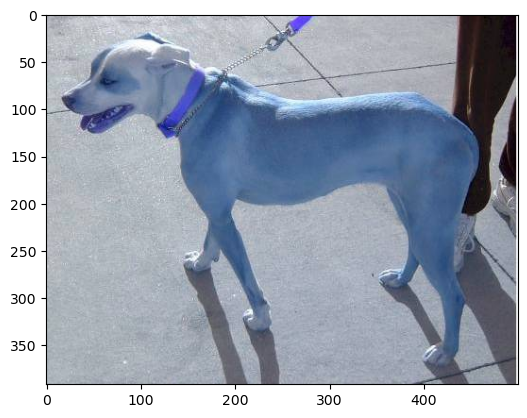

In [86]:

img = cv2.imread('dog.4145.jpg')
plt.imshow(img)
plt.show( )

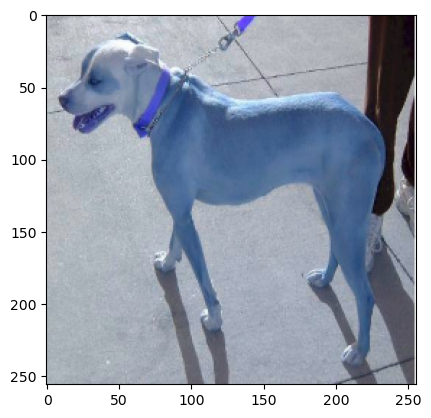

In [87]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [88]:
yhat1 = cnn.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


In [89]:
yhat1

array([[0.9999456]], dtype=float32)

In [80]:
if yhat1 > 0.5: 
    print(f'Predicted class is cat.')
else:
    print(f'Predicted class is dog.')

Predicted class is cat.


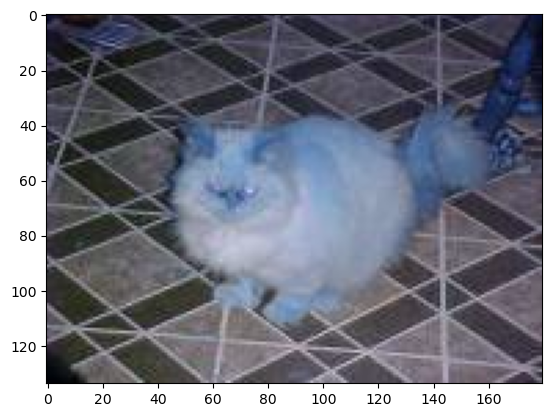

In [96]:
img = cv2.imread('cat.4650.jpg')
plt.imshow(img)
plt.show()

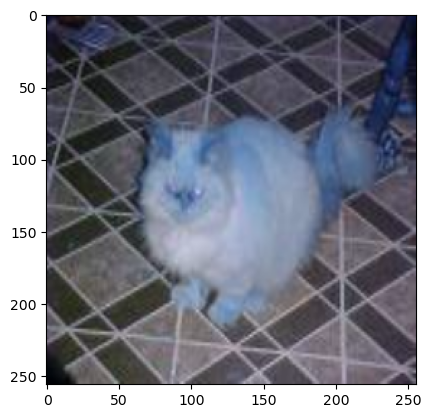

In [97]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [98]:
yhat2 = cnn.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


In [99]:
yhat2

array([[0.19665264]], dtype=float32)

In [82]:
if yhat2 > 0.5: 
    print(f'Predicted class is dog.')
else:
    print(f'Predicted class is cat.')

Predicted class is cat.


# Saving Model

In [100]:
from tensorflow.keras.models import load_model

In [105]:
cnn.save(os.path.join('CatDog', 'Cat_Dog_model.h5'))